# ART Example 1: Maximize Limonene Production

In this notebook we demonstrate the usage of the Automatic Recommendation Tool (ART) to recommend strain designs for improving limonene production. 

In this case we have proteomics data which will be used to determine maximum production of limonene in terms of total protein concentrations. Then target protein concentrations will be reported back to the user.


Tested using **ART_v3.6** kernel on jprime.lbl.gov. 

## Inputs and Outputs

#### Required file to run this notebook:
- `Limonene_data_for_ART.csv` file from the `data` directory

#### Files generated by running this notebook:
 
- a pickle file containing a trained ART object 
- a file containing predictive accuracy metrics
- plot of (cross-validated) predictions vs observations for the train data set
- `draws.txt`, containing all draws from the optimization procedure
- `recommendations.csv`, containing the ART recommendations for the next cycle
- plot of predictive distributions for the recommendations
- plot of success probabilities for the recommendations


## Setup

The first step is to make sure the `ART` library is available in your kernel.

Clone the corresponding git repository:


`git clone https://github.com/JBEI/AutomatedRecommendationTool.git`  

or pull the latest version. 

Information about licensing ART is available at https://github.com/JBEI/ART.



We can then add library to the path and do the necessary import:


In [1]:
import sys
sys.path.append('../../AutomatedRecommendationTool')        # Make sure this is the location for the ART library 
    
from art.core import *                                  


## User parameters

Define some of the ART input parameters:

In [2]:
user_params = {}
user_params['data_file'] = '../data/Limonene_data_for_ART.csv'            # Training data file
user_params['input_vars'] = ['ATOB_ECOLI','ERG8_YEAST','IDI_ECOLI',
                            'KIME_YEAST','MVD1_YEAST','Q40322_MENSP',
                            'Q8LKJ3_ABIGR','Q9FD86_STAAU','Q9FD87_STAAU'] # A list of the relevant input variables (features) to use for model building    
user_params['response_vars'] = ['4-isopropenyl-1-methyl-cyclohexene']      # Response variable
user_params['objective'] = 'maximize'                                     # Type of the objective
user_params['threshold'] = 0.2                                            # Relative threshold for defining success (e.g. setting to 0.2 means 
# improving the production from the best in the data set by 20% is considered a success)
user_params['num_recommendations'] = 10                                   # Number of recommendations to be provided
user_params['output_directory'] = '../results/Limonene'                    # Directory to store output files
user_params['verbose'] = 1                                                # Amount of information to be displayed


## Load the study data into a dataframe

In [3]:
df = utils.load_study(data_file=user_params['data_file'])

In [4]:
df.head()

Study ID             Study Name Line Name  \
0     54255  Limonene data for ART      B.Mm   
1     54255  Limonene data for ART      A.Ml   
2     54255  Limonene data for ART     BL.Mm   
3     54255  Limonene data for ART      A.Mh   
4     54255  Limonene data for ART      A.Hl   

                                    Line Description  Strain(s)  \
0  DH1 with single plasmid (medium-copy) expressi...        NaN   
1  DH1 with single plasmid (high-copy) expression...        NaN   
2  DH1 with two plasmid (B + high with extra copy...        NaN   
3  DH1 with single plasmid (high-copy) expression...        NaN   
4  DH1 with single plasmid (high-copy) expression...        NaN   

                         Media  Starting OD Protocol Name  Assay ID  \
0  EZrich (Teknova) 1% Glucose          1.2         OD600     55297   
1  EZrich (Teknova) 1% Glucose          1.2         OD600     55298   
2  EZrich (Teknova) 1% Glucose          1.2         OD600     55299   
3  EZrich (Teknova) 1% Glucose          1.2         OD600     55300   
4  EZrich (Teknova) 1% Glucose          2.5         OD600     55301   

  Assay Name             Type               Measurement Updated X Units  \
0       B.Mm  Optical Density  2018-09-26 21:46:11.720910+00:00   hours   
1       A.Ml  Optical Density  2018-09-26 21:46:11.720910+00:00   hours   
2      BL.Mm  Optical Density  2018-09-26 21:46:11.720910+00:00   hours   
3       A.Mh  Optical Density  2018-09-26 21:46:11.720910+00:00   hours   
4       A.Hl  Optical Density  2018-09-26 21:46:11.720910+00:00   hours   

  Y Units       24  
0     NaN  5.31867  
1     NaN  4.88600  
2     NaN  4.40000  
3     NaN  5.29333  
4     NaN  5.03733

## Running ART to create a predictive model of production and generate recommendations

The first step is to create a dictionary that contains the settings for ART:

In [8]:
art_params = {
    'response_vars': user_params['response_vars'],
    'input_vars': user_params['input_vars'],
    'objective': user_params['objective'],
    'threshold': user_params['threshold'],
    'num_recommendations': user_params['num_recommendations'],   
    'seed': 10,
    'cross_val': True,
    'verbose': user_params['verbose'],
    'output_directory': user_params['output_directory']
}

The objective is to predict strain designs which will **maximize** production. Successful designs are considered to be those that exceed the maximum observed production by 20%, as specified by the `threshold` variable.


### Run ART

With the configuration stored in `art_params`, we now run ART (this takes ~20min if cross-validation is performed, otherwise it takes ~5min):

Once the model is trained, we use it to find inputs that maximize the limonene production.

/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Best pipeline: ElasticNetCV(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=DEFAULT), ElasticNetCV__l1_ratio=0.4, ElasticNetCV__tol=DEFAULT)


/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_select

Best pipeline: LassoLarsCV(FeatureAgglomeration(input_matrix, FeatureAgglomeration__affinity=precomputed, FeatureAgglomeration__linkage=average), LassoLarsCV__normalize=False)


/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/li

Best pipeline: RidgeCV(LassoLarsCV(FeatureAgglomeration(input_matrix, FeatureAgglomeration__affinity=precomputed, FeatureAgglomeration__linkage=average), LassoLarsCV__normalize=False))


/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/li

Best pipeline: KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=1, KNeighborsRegressor__p=DEFAULT, KNeighborsRegressor__weights=uniform)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:26<00:00, 833.35draws/s]
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Best pipeline: ElasticNetCV(PolynomialFeatures(FeatureAgglomeration(input_matrix, FeatureAgglomeration__affinity=cosine, FeatureAgglomeration__linkage=complete), PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=DEFAULT, PolynomialFeatures__interaction_only=DEFAULT), ElasticNetCV__l1_ratio=0.15000000000000002, ElasticNetCV__tol=0.0001)


/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/li

Best pipeline: LinearSVR(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__n_estimators=100), LinearSVR__C=10.0, LinearSVR__dual=False, LinearSVR__epsilon=0.001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.01)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:28<00:00, 766.71draws/s]
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Best pipeline: RandomForestRegressor(RidgeCV(Normalizer(input_matrix, Normalizer__norm=l1)), RandomForestRegressor__bootstrap=DEFAULT, RandomForestRegressor__max_features=0.9000000000000001, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:21<00:00, 1004.65draws/s]


/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Best pipeline: RidgeCV(VarianceThreshold(PCA(input_matrix, PCA__iterated_power=10, PCA__svd_solver=randomized), VarianceThreshold__threshold=0.5))


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:21<00:00, 1027.06draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Best pipeline: ElasticNetCV(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=DEFAULT, PolynomialFeatures__interaction_only=DEFAULT), ElasticNetCV__l1_ratio=0.5, ElasticNetCV__tol=1e-05)


/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/li

Best pipeline: ElasticNetCV(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), ElasticNetCV__l1_ratio=0.15000000000000002, ElasticNetCV__tol=0.1)


/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/li

MAE     MRAE(%)      StdAE          MSE  \
Name                                                                         
Neural Regressor             20.792671  110.270971  20.987192   872.797404   
Random Forest Regressor      22.429269  203.616382  19.106541   868.132024   
TPOT Regressor               17.832590  112.304969  17.791996   634.556381   
Support Vector Regressor     27.350860  167.500699  29.190907  1600.178560   
Kernel Ridge Regressor       20.304178  115.537782  23.297712   955.043003   
K-NN Regressor               18.444413  150.032013  17.981583   663.533698   
Gaussian Process Regressor   27.571575  267.617494  21.815826  1236.122027   
Gradient Boosting Regressor  17.517936  143.540533  17.502119   613.202227   
Ensemble Model               17.036013  108.145723  15.293800   524.126081   

                                $R^2$  
Name                                   
Neural Regressor             0.353393  
Random Forest Regressor      0.356850  
TPOT Regressor               0.529893  
Support Vector Regressor    -0.185483  
Kernel Ridge Regressor       0.292462  
K-NN Regressor               0.508425  
Gaussian Process Regressor   0.084226  
Gradient Boosting Regressor  0.545713  
Ensemble Model               0.611704

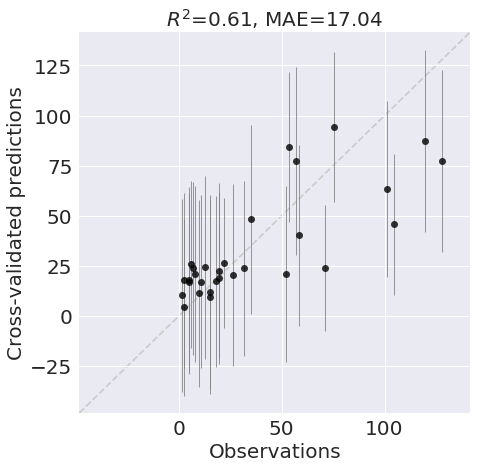

/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Best pipeline: RidgeCV(DecisionTreeRegressor(FeatureAgglomeration(input_matrix, FeatureAgglomeration__affinity=precomputed, FeatureAgglomeration__linkage=average), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=13, DecisionTreeRegressor__min_samples_split=14))


/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [omegas, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:19<00:00, 1107.83draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


MAE     MRAE(%)      StdAE           MSE  \
Name                                                                          
Neural Regressor              0.097560    0.990360   0.222568  5.905438e-02   
Random Forest Regressor       9.768798   65.567237   8.755191  1.720828e+02   
TPOT Regressor               15.493968  119.417013  13.047534  4.103012e+02   
Support Vector Regressor     25.816751  151.889853  28.865585  1.499727e+03   
Kernel Ridge Regressor       12.574144   82.423719  11.951892  3.009568e+02   
K-NN Regressor               14.385255  102.244064  14.015780  4.033776e+02   
Gaussian Process Regressor    0.000021    0.000213   0.000014  6.456474e-10   
Gradient Boosting Regressor   0.103705    1.008630   0.083743  1.776753e-02   
Ensemble Model               10.466518   69.649149   9.940372  2.083590e+02   

                                $R^2$  
Name                                   
Neural Regressor             0.999956  
Random Forest Regressor      0.872514  
TPOT Regressor               0.696031  
Support Vector Regressor    -0.111063  
Kernel Ridge Regressor       0.777038  
K-NN Regressor               0.701160  
Gaussian Process Regressor   1.000000  
Gradient Boosting Regressor  0.999987  
Ensemble Model               0.845638

Finished 2.00 percent in 2.394679 s Acceptance rate = 0.316Adding DE jump with weight 20
Finished 99.00 percent in 95.588580 s Acceptance rate = 0.230838
Run Complete


ATOB_ECOLI  ERG8_YEAST  IDI_ECOLI  KIME_YEAST  MVD1_YEAST  Q40322_MENSP  \
0    0.218342    0.260281   2.491320    1.480789    4.063428     14.112370   
1    0.234206    0.186433   2.631791    1.466854    4.079612     14.040201   
2    0.241177    0.593763   2.635061    1.476942    3.974173     14.200707   
3    0.241057    0.446392   2.430833    1.351156    4.218492     13.962244   
4    0.311280    0.541223   2.625381    1.403694    4.035341     14.167358   
5    0.249659    0.143297   2.572427    1.477782    4.085782     13.607532   
6    0.258514    0.496217   1.868473    1.471325    4.085621     14.142297   
7    0.281085    0.212649   2.466410    1.348570    4.124726     13.888037   
8    0.233142    0.330961   2.517194    1.448379    4.214362     13.728017   
9    0.218596    0.159485   2.460587    1.155999    3.860295     13.853541   

   Q8LKJ3_ABIGR  Q9FD86_STAAU  Q9FD87_STAAU  \
0      4.740141      0.440511      0.542264   
1      4.735709      0.425831      0.582515   
2      4.744894      0.449222      0.542008   
3      4.731818      0.420172      0.547300   
4      4.705895      0.434928      0.542202   
5      4.708181      0.418856      0.555863   
6      4.747490      0.417627      0.578515   
7      4.737759      0.436761      0.558939   
8      4.733667      0.442724      0.575529   
9      4.737678      0.424737      0.542023   

   4-isopropenyl-1-methyl-cyclohexene  
0                          123.420252  
1                          123.257852  
2                          123.228856  
3                          123.045569  
4                          122.710899  
5                          122.550819  
6                          122.378148  
7                          122.357037  
8                          122.326542  
9                          122.297105

/usr/local/share/jupyteruser/.pyenv/versions/ART_3.6/lib/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


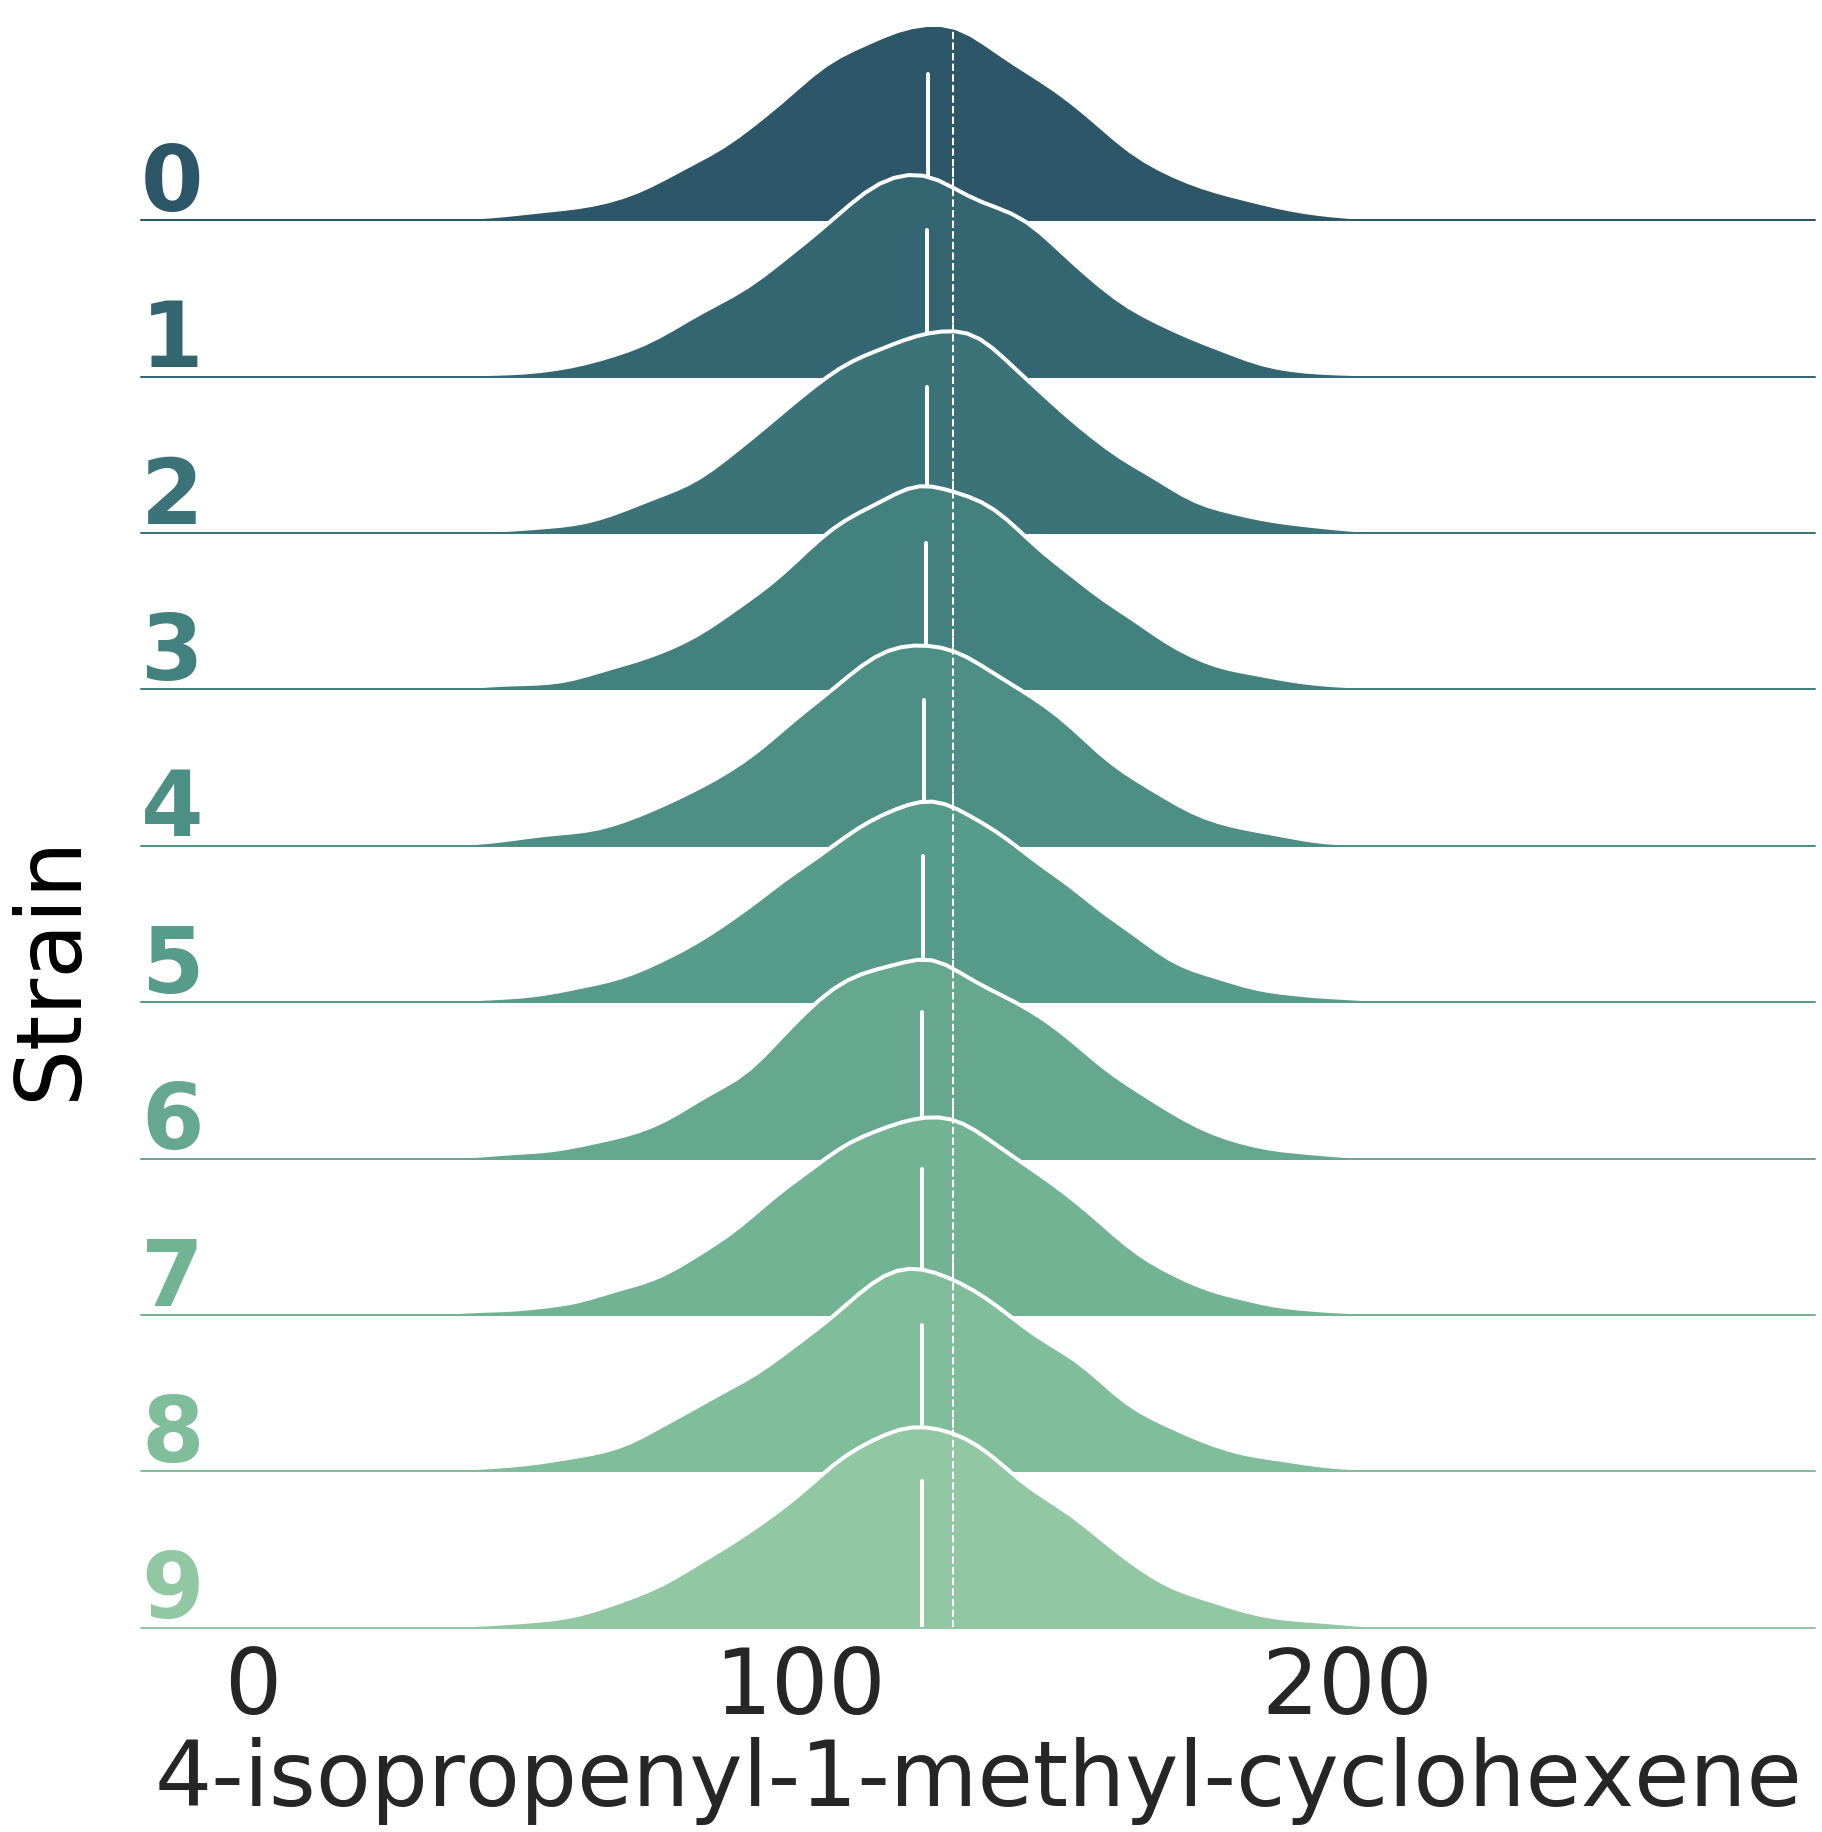

CPU times: user 18min 11s, sys: 5min 2s, total: 23min 14s
Wall time: 20min 10s


In [9]:
%%time
art = RecommendationEngine(df, **art_params)


In [27]:
utils.save_pkl_object(art)